<img src=images/gdd-logo.png width=300px align=right>

# Hawks Hackathon

## About the data
Students and faculty at Cornell College in Mount Vernon, Iowa, collected data over many years at the hawk blind at Lake MacBride near Iowa City, Iowa. The data set that we are analyzing here is a subset of the original data set, using only those species for which there were more than 10 observations. Data were collected on random samples of three different species of hawks: Red-tailed, Sharp-shinned, and Cooper's hawks. Professor Bob Black at Cornell College shared the data. 

The dataset provides a great dataset for data exploration & visualisation. 

|Field|Description|
|:---|:---|
|month|	8=September to 12=December|
|day|	Date in the month|
|year|	Year: 1992-2003|
|capturetime|	Time of capture (HH:MM)|
|releasetime|	Time of release (HH:MM)|
|bandnumber|	ID band code|
|species|	CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned|
|age|	A=Adult or I=Imature|
|wing|	Length (in mm) of primary wing feather from tip to wrist it attaches to|
|weight|	Body weight (in gm)|
|culmen|	Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird|
|hallux|	Length (in mm) of the killing talon|
|tail|	Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center)|
|standardtail|	Standard measurement of tail length (in mm)|
|tarsus|	Length of the basic foot bone (in mm)|
|wingpitfat|	Amount of fat in the wing pit|
|keelfat|	Amount of fat on the breastbone (measured by feel)|
|crop|	Amount of material in the crop, coded from 1=full to 0=empty|

## Hackathon

The goal of this hackathon is to explore data and get some key insights from the data to learn about the three different types of hawk species. 

<img src='images/hawkscropped.png'> 

### Steps to completion

The first thing you must so with any analysis is to **come up with an overall business goal**. This should be a general question you want to answer, or hypothesis you want to determine is true or not. You can choose from one of the following questions, or make up your own:
   - Has the number of hawks for each species increased or decreased over time?
   - What is the most common time of year/day to see a hawk?
    
Once you have your business goal you can follow the following steps:

1. [**Load the data:**](#one)
2. [**Exploratory Analysis:**](#two)
3. [**Build a model**](#three)
4. [**Summary & Next Steps:**](#four)

In [1]:
import pandas as pd
import numpy as np

<a id = 'one'></a>
## 1. Loading our data

There are many places your data can originate from. Maybe you want to load it from a Excel file you have stored locally on your system, maybe you have a .csv file stored online somewhere. Scikit-learn comes with various standard datasets that can be used for practice, that can be loaded if you have scikit-learn installed on your system. 

However, the dataset we will be using today (the R hawks dataset) does not come from scikit-learn, but from a package in R. Luckily for us we can access that data [from here](https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Hawks.csv)

The data has been downloaded stored here: `'../data/hawks.csv'`.

In [67]:
hawks = pd.read_csv('data/hawks.csv')
hawks.head()

,month,day,year,capturetime,releasetime,bandnumber,species,age,sex,wing,hallux,tail,standardtail,tarsus,wingpitfat,keelfat,crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,30.1,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,31.3,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,23.5,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,14.3,157,NaN,NaN,NaN,NaN,NaN


<a id = 'two'></a>
## 2. Exploratory Analysis

The first thing we must do before we answer our overall goal is to ask small questions to start to understand the data. Answer the following questions (and come up with any of your own related to your overall goal):

1. How many missings are there in each column?

In [73]:
hawks.isnull().sum()

month             0
day               0
year              0
capturetime       0
releasetime       1
bandnumber        0
species           0
age               0
sex             576
wing              1
hallux            6
tail              0
standardtail    337
tarsus          833
wingpitfat      831
keelfat         341
crop            343
dtype: int64

2. What is the mean length (in mm) of the tail of the hawks?

In [74]:
hawks['tail'].min()

119

3. What is the median tail by species?

In [75]:
hawks.groupby('species')['tail'].median()

species
CH    199.0
RT    221.0
SS    150.0
Name: tail, dtype: float64

4. How many observations do you have for each year?

<AxesSubplot:>

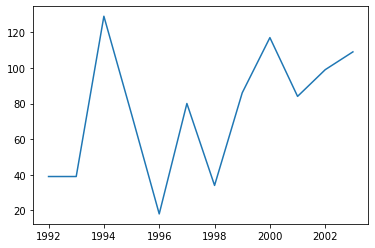

In [78]:
hawks['year'].value_counts().sort_index().plot()

5. What were the most common times of capture?

In [80]:
hawks['capturetime'].mode()

0    11:35
1    13:30
Name: capturetime, dtype: object

<a id = 'three'></a>
## 3. Build a Decision Tree model

1. Remove any columns with a missing value ratio of 10% or higher
2. Drop the remaining missing values 
3. Remove any categorical columns
4. Split the data into X and y
5. Use the train_test_split method using a random_state
6. Instantiate a DecisionTreeClassifier with a max_depth of 5
7. Fit the model to `X_train` and `y_train`
8. Calculate the `accuracy_score` and print the `classfication report`

In [68]:
missing_cols = list(hawks.columns[hawks.isnull().mean()>0.1])
cat_cols = ['capturetime', 'releasetime', 'bandnumber', 'age']

In [69]:
cleaned_hawks = (
    hawks
    .drop(columns=missing_cols + cat_cols)
    .dropna()
)

X = cleaned_hawks.drop(columns=['species'])
y = cleaned_hawks['species']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

for df in (X_train, X_test, y_train, y_test ):
    print(df.shape)

(675, 6)
(226, 6)
(675,)
(226,)


In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=123)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [72]:
from sklearn.metrics import classification_report
print(f"Accuracy score: {model.score(X_test, y_test)}")

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy score: 0.9867256637168141
              precision    recall  f1-score   support

          CH       1.00      0.88      0.93        16
          RT       0.99      0.99      0.99       146
          SS       0.97      1.00      0.98        64

    accuracy                           0.99       226
   macro avg       0.99      0.96      0.97       226
weighted avg       0.99      0.99      0.99       226



<a id = 'four'></a>
## 4. Summary & Next Steps

What have you learned about this data? What do you need to or want to look at next?

